# Tagging Sequences and Chunking with NLTK

Kevin Nolasco

Cabrini University

MCIS565 - Natural Language Processing

04/10/2022

# Prompt

Pick one of the three chunk types in the CoNLL corpus. Write functions to do the following tasks for your chosen type:
- List all the tag sequences that occur with each instance of this chunk type.
- Count the frequency of each tag sequence, and produce a ranked list in order of decreasing frequency; each line should consist of an integer (the frequency) and the tag sequence.
- Inspect the high-frequency tag sequences. Use these as the basis for developing a better chunker.

## Load Data

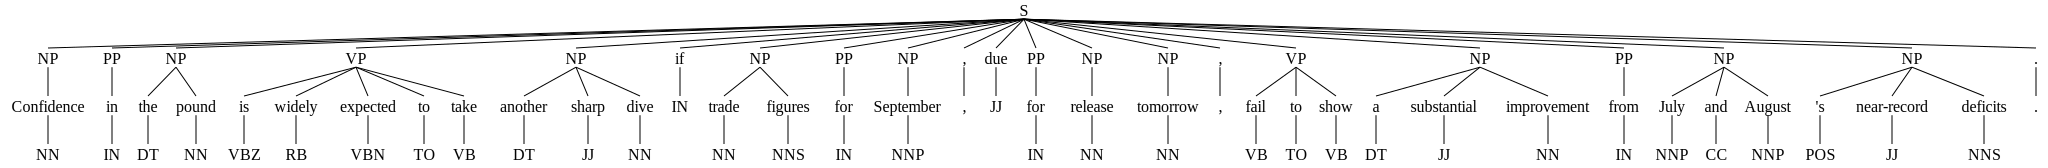

In [10]:
# load CoNLL corpus
from nltk.corpus import conll2000
import nltk
conll2000.chunked_sents('train.txt')[0]

In [2]:
# choose only the NN chunk type
train_chunks = conll2000.chunked_sents('train.txt', chunk_types=['NP'])

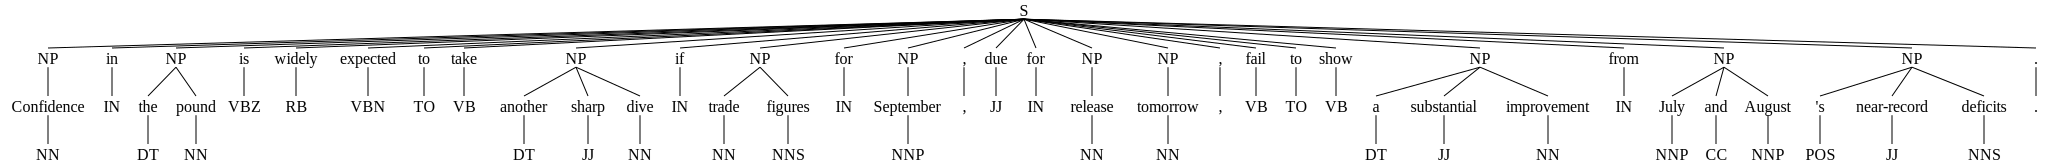

In [3]:
train_chunks[0]

## Prompt 1

List all the tag sequences that occur with each instance of this chunk type.

In [41]:
def list_tag_sequences(train_trees):
    # prepare list of tag sequences
    tag_seqs = []
    # go through each tree in train trees
    for tree in train_trees:
        # keep the chunks that are 'NP' types
        chunked_by_NP = [chunk for chunk in tree if type(chunk) == nltk.tree.Tree]
        # look through each chunk
        for chunk in chunked_by_NP:
            # save the tag for the chunk
            tag_seqs.extend([[tag for (_, tag) in chunk]])
    return tag_seqs

In [42]:
tag_seqs = list_tag_sequences(train_chunks)

In [44]:
# look at the first 20
tag_seqs[:20]

[['NN'],
 ['DT', 'NN'],
 ['DT', 'JJ', 'NN'],
 ['NN', 'NNS'],
 ['NNP'],
 ['NN'],
 ['NN'],
 ['DT', 'JJ', 'NN'],
 ['NNP', 'CC', 'NNP'],
 ['POS', 'JJ', 'NNS'],
 ['DT', 'NNP'],
 ['NNP', 'NNP'],
 ['POS', 'VBN', 'NN'],
 ['DT', 'NN', 'JJ', 'NN'],
 ['DT', 'NN'],
 ['NN'],
 ['DT', 'JJ', 'NN'],
 ['NNS'],
 ['VBG', 'NN'],
 ['NN']]

## Prompt 2
Count the frequency of each tag sequence, and produce a ranked list in order of decreasing frequency; each line should consist of an integer (the frequency) and the tag sequence.

In [63]:
# I want to use nltk.FreqDist()
# this expects an iterable object, so I need to transform the list into a string of tags
def list_to_string(tag_seqs):
    list_of_strings = []
    for seq in tag_seqs:
        list_of_strings.append('-'.join(seq))
    return list_of_strings

str_tag_seqs = list_to_string(tag_seqs)

In [64]:
str_tag_seqs[:20]

['NN',
 'DT-NN',
 'DT-JJ-NN',
 'NN-NNS',
 'NNP',
 'NN',
 'NN',
 'DT-JJ-NN',
 'NNP-CC-NNP',
 'POS-JJ-NNS',
 'DT-NNP',
 'NNP-NNP',
 'POS-VBN-NN',
 'DT-NN-JJ-NN',
 'DT-NN',
 'NN',
 'DT-JJ-NN',
 'NNS',
 'VBG-NN',
 'NN']

To conserve space, we will look at the top 20 most frequent tag sequences.

In [65]:
my_seq_dist = nltk.FreqDist(str_tag_seqs)
my_seq_dist.most_common(20)

[('DT-NN', 7223),
 ('PRP', 3802),
 ('NNS', 3282),
 ('NNP', 3249),
 ('NN', 3245),
 ('NNP-NNP', 2642),
 ('DT-JJ-NN', 2119),
 ('JJ-NNS', 1722),
 ('DT-NNS', 1173),
 ('JJ-NN', 1143),
 ('NN-NNS', 1012),
 ('WDT', 930),
 ('DT-NN-NN', 921),
 ('CD', 866),
 ('CD-NN', 830),
 ('$-CD-CD', 824),
 ('CD-NNS', 690),
 ('NNP-NNP-NNP', 677),
 ('PRP$-NN', 624),
 ('POS-NN', 552)]

Above we can see that the most common tag sequence for NP (noun phrase) is DT NN (optional delimeter followed by a noun of any type.)

## Prompt 3
Inspect the high-frequency tag sequences. Use these as the basis for developing a better chunker.